# Week 6 - An introduction to machine learning (PART1) - Solutions

We will work with the built-in `sklearn.datasets` diabetes dataset.
This dataset comprises 442 diabetes patients, each with ten baseline predictors: age, sex, body mass index, average blood pressure, and six blood serum measurements. The response variable is measure of disease progression one year after baseline. (Note that it is not neccessary to transform any of these variables prior to training the model - everything is all ready to go straight into `sklearn`.)

Details:

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [108]:
import pandas as pd
import plotnine as p9
from sklearn import datasets
import sklearn.linear_model as linear

In [36]:
diabetes_dataset = datasets.load_diabetes()
predictors = pd.DataFrame(data=diabetes_dataset.data, columns=diabetes_dataset.feature_names)
response = diabetes_dataset.target

predictors.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [37]:
response_dataframe = pd.DataFrame({"response": response})

response_dataframe.describe()

,response
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


In [38]:
predictors.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [39]:
print(diabetes_dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

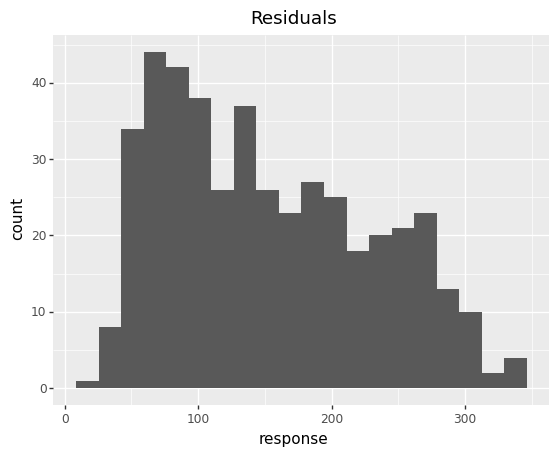

<ggplot: (8774178532785)>

In [109]:
p9.ggplot(response_dataframe, p9.aes('response')) + p9.geom_histogram(bins=20) + p9.ggtitle("Residuals")

In [110]:
import plotly.express as px
fig = px.histogram(response_dataframe, 
                   x="response", 
                   nbins=20,
                   title="Residuals")
fig.show()

## Exercise 1

Using `sklearn`, fit a multivariate linear regression using all 442 samples to predict the response variable. Use all 10 predictors, and also score your model using predictions on all 442 samples.

In [111]:
# Instantiate the model
model = linear.LinearRegression()
# Fit the pipeline
model.fit(X=predictors, y=response)

# Inspect the fit regression coefficients and intercept
model.intercept_, model.coef_

(152.1334841628965,
 array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
        -792.18416163,  476.74583782,  101.04457032,  177.06417623,
         751.27932109,   67.62538639]))

Now score our model using the same dataset we used to fit the model.

In [112]:
model.score(X=predictors, y=response)

0.5177494254132934

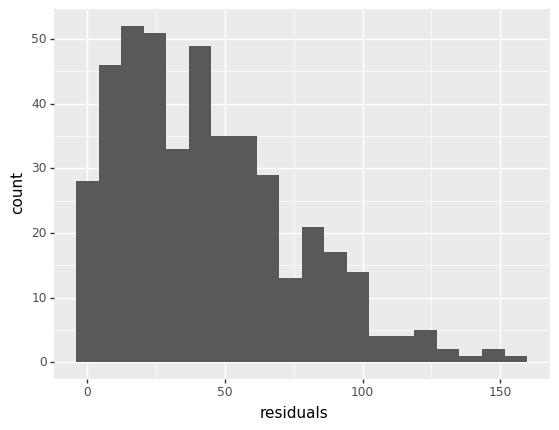

<ggplot: (8774178706189)>

In [113]:
import numpy as np
response_predicted = model.predict(X=predictors)
residuals = pd.DataFrame({'residuals': np.abs(response - response_predicted)})

# the aes object contains only the variable that will be plotted on the x axis i.e. the one for which we want to generate a distribution
p9.ggplot(residuals, p9.aes('residuals')) + p9.geom_histogram(bins=20)

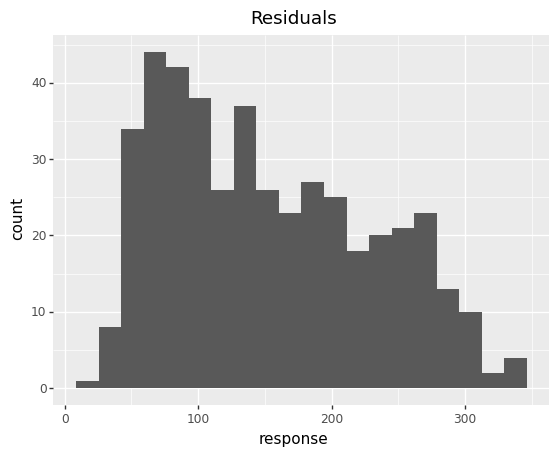

<ggplot: (8774178455441)>

In [114]:
p9.ggplot(response_dataframe, p9.aes('response')) + p9.geom_histogram(bins=20) + p9.ggtitle("Residuals")

## Exercise 2

Do a test-train split, and run Exercise 1 again, this time fitting your model with the training set, and scoring it both with the test set and with the training set.

In [115]:
from sklearn.model_selection import train_test_split

predictors_train, predictors_test, response_train, response_test = train_test_split(predictors, 
                                                                                    response,
                                                                                    test_size=0.3, 
                                                                                    random_state=42, 
                                                                                    shuffle=True)

In [116]:
# Instantiate the model
model = linear.LinearRegression()
# Fit the pipeline
model.fit(X=predictors_train, y=response_train)
# Inspect the fit regression coefficients and intercept
model.intercept_, model.coef_

(151.00818273080338,
 array([  29.25034582, -261.70768053,  546.29737263,  388.40077257,
        -901.95338706,  506.761149  ,  121.14845948,  288.02932495,
         659.27133846,   41.37536901]))

In [117]:
model.score(X=predictors_test, y=response_test)

0.4772920174157329

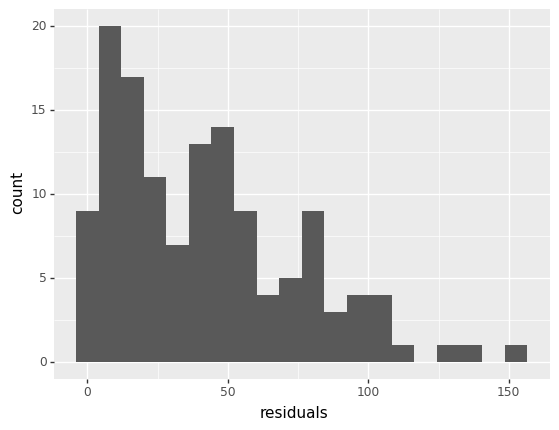

<ggplot: (8774178297921)>

In [118]:
response_predicted = model.predict(X=predictors_test)
residuals = pd.DataFrame({'residuals': np.abs(response_test - response_predicted)})
p9.ggplot(residuals, p9.aes('residuals')) + p9.geom_histogram(bins=20)

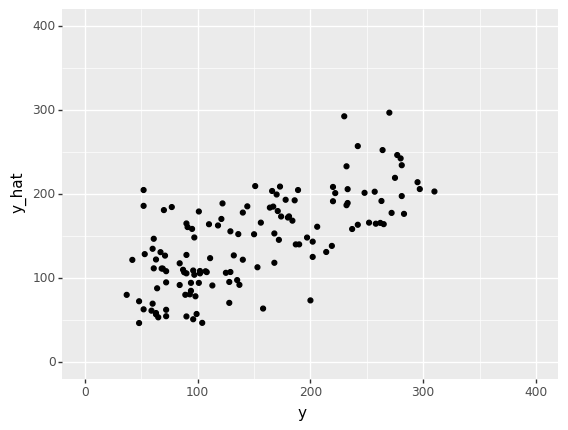

<ggplot: (8774178628313)>

In [119]:
# Display the results as a scatter plot
predictions = pd.DataFrame({'y': response_test, 'y_hat': response_predicted}) # plotnine works with pd.DataFrame

(
p9.ggplot(predictions, p9.aes('y', 'y_hat'))
    + p9.geom_point()
    + p9.scales.xlim(0, 400)
    + p9.scales.ylim(0, 400)
) # plotnine will emit a `PlotnineWarning` indicating that we have cropped some points from our plot

## Exercise 3

As with Exercise 2, but this time try using the default RandomForestRegressor instead. How do your results compare? Try just using one or two predictors.

In [120]:
from sklearn import ensemble
model = ensemble.RandomForestRegressor(n_estimators=100, max_depth=3)
model.fit(X=predictors_train, y=response_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

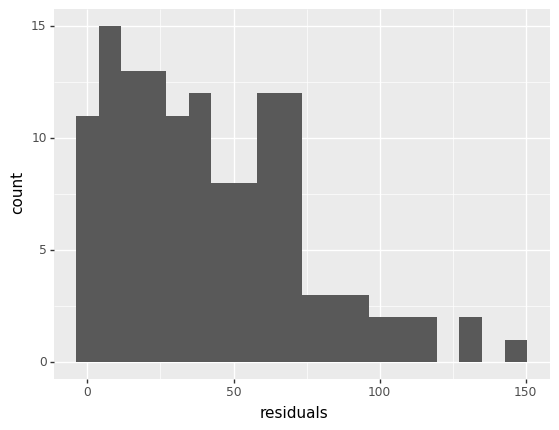

<ggplot: (8774178456861)>

In [121]:
response_predicted = model.predict(X=predictors_test)
residuals = pd.DataFrame({'residuals': np.abs(response_test - response_predicted)})
p9.ggplot(residuals, p9.aes('residuals')) + p9.geom_histogram(bins=20)

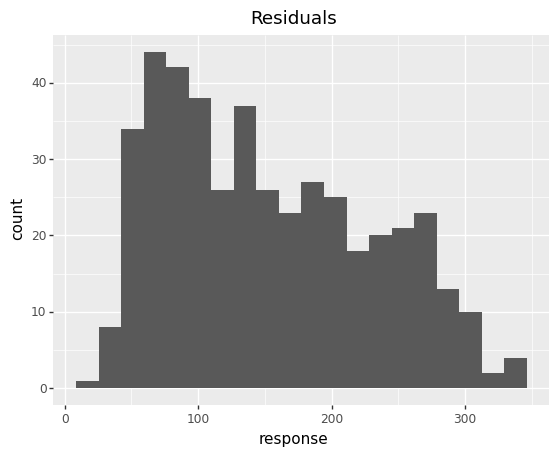

<ggplot: (8774178614149)>

In [122]:
p9.ggplot(response_dataframe, p9.aes('response')) + p9.geom_histogram(bins=20) + p9.ggtitle("Residuals")

A little bit of experimentation with C and gamma means we now beat the linear model - just!

In [123]:
model.score(X=predictors_test, y=response_test)

0.48374522204294873

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning:

geom_point : Removed 1 rows containing missing values.



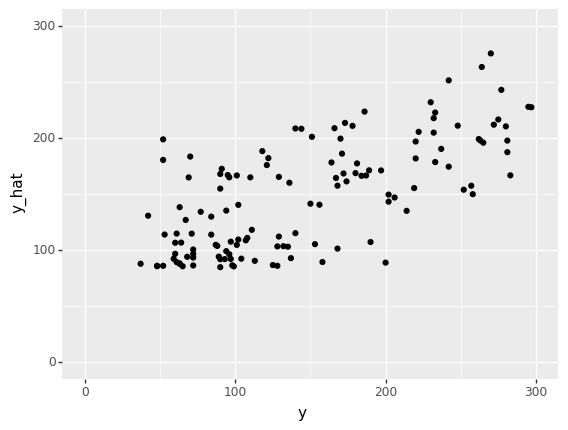

<ggplot: (8774178306541)>

In [124]:
predictions = pd.DataFrame({'y': response_test, 'y_hat': response_predicted}) # plotnine works with pd.DataFrame

(
p9.ggplot(predictions, p9.aes('y', 'y_hat'))
    + p9.geom_point()
    + p9.scales.xlim(0, 300)
    + p9.scales.ylim(0, 300)
)

## Exercise 4

Dive into the documentation of RandomForestRegressor and try tweaking some of the hyperparameters to see how this affects your model score on the training and test datasets ('n_estimators' and 'max_depth' are good places to start). If you want do delve deeper this blog post is a nice introduction to the concepts of cross-validation and hyperparameter tuning (more on this next week though!).

In [125]:
n_estimators_min, n_estimators_max = 2, 100
max_depth_min, max_depth_max = 2, 10

In [126]:
grid_parameters = np.mgrid[n_estimators_min - 1:n_estimators_max + 1:20j,  max_depth_min - 1:max_depth_max + 1:9j]
parameters = grid_parameters.reshape((2, -1)).T

In [127]:
scores = np.empty(parameters.shape[0])
for i, (n_estimators, max_depth) in enumerate(parameters):
    print("i: ", i)
    print("n_estimators: ", int(n_estimators))
    print("max_depth: ", int(max_depth))
    model = ensemble.RandomForestRegressor(n_estimators=int(n_estimators), max_depth=int(max_depth), random_state = np.random.seed(1234))
    model.fit(X=predictors_train, y=response_train)
    score = model.score(X=predictors_test, y=response_test)
    print("score: ", score)
    scores[i] = score

i:  0
n_estimators:  1
max_depth:  1
score:  0.39866465124442146
i:  1
n_estimators:  1
max_depth:  2
score:  0.306769087559461
i:  2
n_estimators:  1
max_depth:  3
score:  0.23537940596017193
i:  3
n_estimators:  1
max_depth:  4
score:  0.2551777542118129
i:  4
n_estimators:  1
max_depth:  6
score:  0.04294079199629808
i:  5
n_estimators:  1
max_depth:  7
score:  -0.058883156084337474
i:  6
n_estimators:  1
max_depth:  8
score:  -0.019560471309697514
i:  7
n_estimators:  1
max_depth:  9
score:  0.11860145113733146
i:  8
n_estimators:  1
max_depth:  11
score:  -0.08161897157565323
i:  9
n_estimators:  6
max_depth:  1
score:  0.3780196737636643
i:  10
n_estimators:  6
max_depth:  2
score:  0.44998274844942493
i:  11
n_estimators:  6
max_depth:  3
score:  0.4879548973404236
i:  12
n_estimators:  6
max_depth:  4
score:  0.51327702639602
i:  13
n_estimators:  6
max_depth:  6
score:  0.42190409090172387
i:  14
n_estimators:  6
max_depth:  7
score:  0.3819892642997613
i:  15
n_estimators:  6

In [128]:
scores.max()

0.51327702639602

In [129]:
scores

array([ 0.39866465,  0.30676909,  0.23537941,  0.25517775,  0.04294079,
       -0.05888316, -0.01956047,  0.11860145, -0.08161897,  0.37801967,
        0.44998275,  0.4879549 ,  0.51327703,  0.42190409,  0.38198926,
        0.39211979,  0.36406598,  0.35727824,  0.36984532,  0.45076508,
        0.48365181,  0.48630423,  0.43013856,  0.41071877,  0.43352614,
        0.40364451,  0.38814951,  0.35535092,  0.45964119,  0.48997202,
        0.47389305,  0.44205944,  0.43364775,  0.44075721,  0.41579974,
        0.42272316,  0.36088736,  0.45430984,  0.49730732,  0.47955024,
        0.44787735,  0.44400255,  0.44888583,  0.42785219,  0.4238103 ,
        0.36973337,  0.45161101,  0.49099907,  0.47719431,  0.4431747 ,
        0.43375325,  0.4387848 ,  0.42032865,  0.41937248,  0.37835467,
        0.46024726,  0.4904854 ,  0.47720077,  0.44610033,  0.44088925,
        0.44344232,  0.42160329,  0.43393388,  0.37044703,  0.46568257,
        0.49410495,  0.4817664 ,  0.45043193,  0.44709183,  0.45

In [130]:
np.where(scores == scores.max())

(array([12]),)

In [131]:
scores = np.reshape(scores, (20, 9))

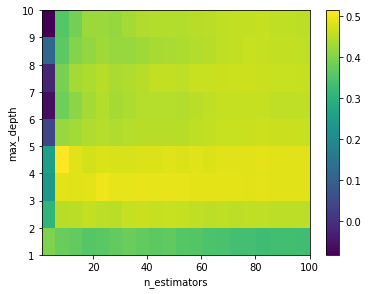

In [132]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 4.5))
ax = fig.add_subplot()
ax.set_ylabel('max_depth')
ax.set_xlabel('n_estimators')
score_min, score_max = scores.min(), scores.max()
plot = ax.imshow(
    np.rot90(scores),
    vmin=score_min,
    vmax=score_max,
    aspect='auto',
    extent=(n_estimators_min - 1, n_estimators_max, max_depth_min - 1, max_depth_max),
    cmap=plt.cm.viridis)

fig.colorbar(plot, ax=ax)

In [133]:
model = ensemble.RandomForestRegressor(n_estimators=6, max_depth=4, random_state = np.random.seed(1234))
model.fit(X=predictors_train, y=response_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=6, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [134]:
model.score(X=predictors_test, y=response_test)

0.51327702639602

In [135]:
from scipy import stats

df = predictors_train
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_predictors_train = df[filtered_entries]

new_response_train = response_train[filtered_entries]

new_predictors_train.shape

(300, 10)

In [136]:
predictors_train.shape

(309, 10)

In [137]:
model = ensemble.RandomForestRegressor(n_estimators=5, max_depth=3)
model.fit(X=new_predictors_train, y=new_response_train)
model.score(X=predictors_test, y=response_test)

0.49035009812322566